# Setup

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook

# Load Data

In [3]:
df = pd.read_csv('vgsales.csv')

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 5.2 MB


# Exploratory Analysis

In [5]:
df.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


In [69]:
df['Platform'].value_counts().head()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
Name: Platform, dtype: int64

In [72]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [70]:
df['Genre'].value_counts().head()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Name: Genre, dtype: int64

In [73]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [71]:
df['Publisher'].value_counts().head()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
Name: Publisher, dtype: int64

In [75]:
len(df['Publisher'].unique())

579

<IPython.core.display.Javascript object>


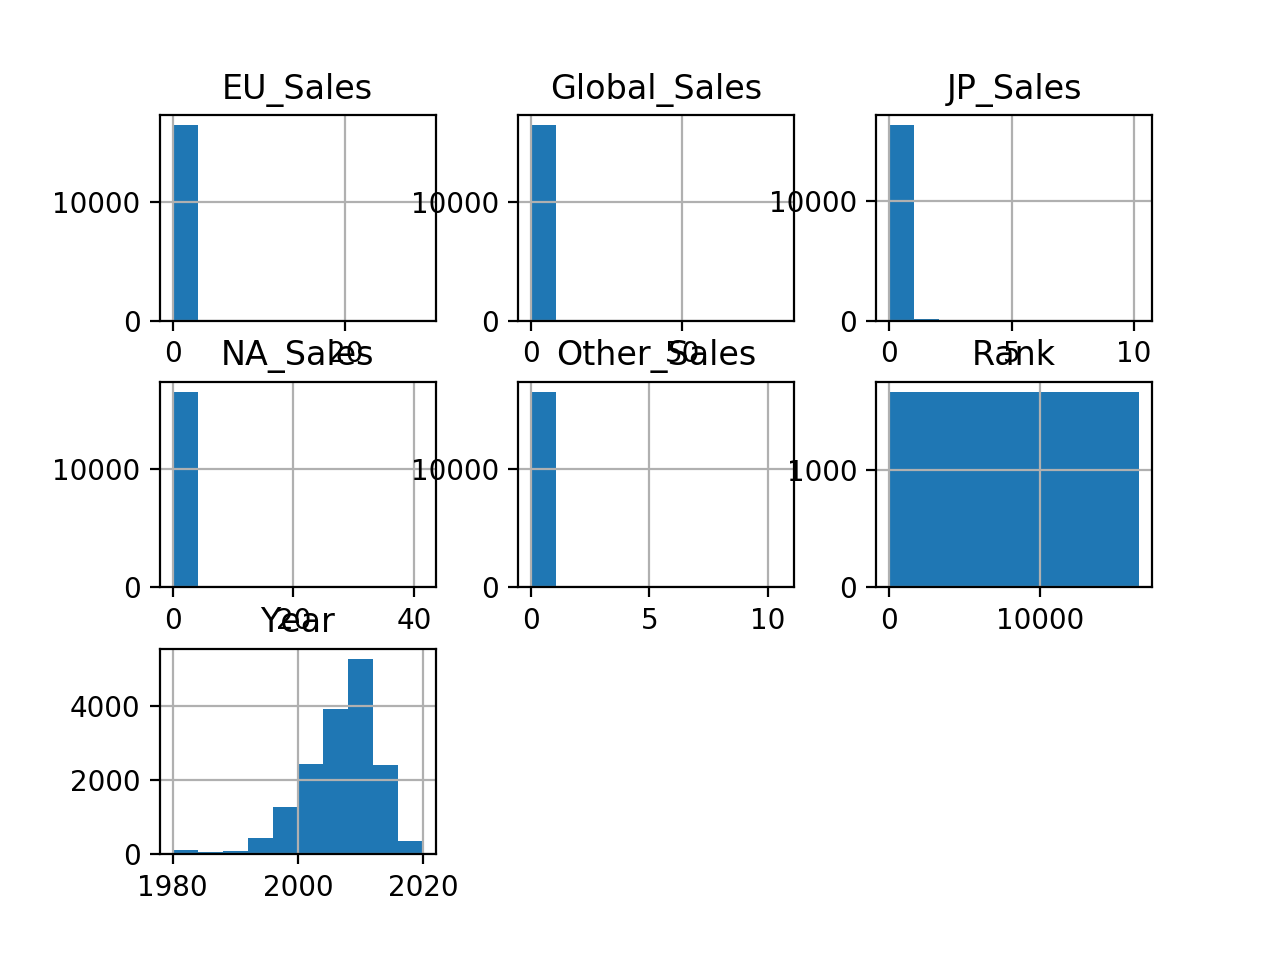

In [12]:
df.hist();

# What video game genres are trending in each market?

In [168]:
def genre_market_trends(fignum, rng=None, lg=False):
    plt.figure(fignum, figsize = (10, 5))
    
    market_sales = ['EU_Sales', 'JP_Sales', 'NA_Sales']
    genres = df['Genre'].unique()
    
    for idx, market in enumerate(market_sales):
        top5_genres_in_market = (df[df[market] > 0]['Genre']
                                 .value_counts()
                                 .index[:5])
        
        plt.subplot(1, len(market_sales), idx + 1)
        for genre in top5_genres_in_market:
            plt.hist(df[df['Genre'] == genre][market],
                     alpha = 0.4,
                     label = genre,
                     range = rng,
                     log = lg)
            plt.legend()
            plt.xlabel('Sales in millions')
            plt.title(market)
            
    plt.show()

<IPython.core.display.Javascript object>


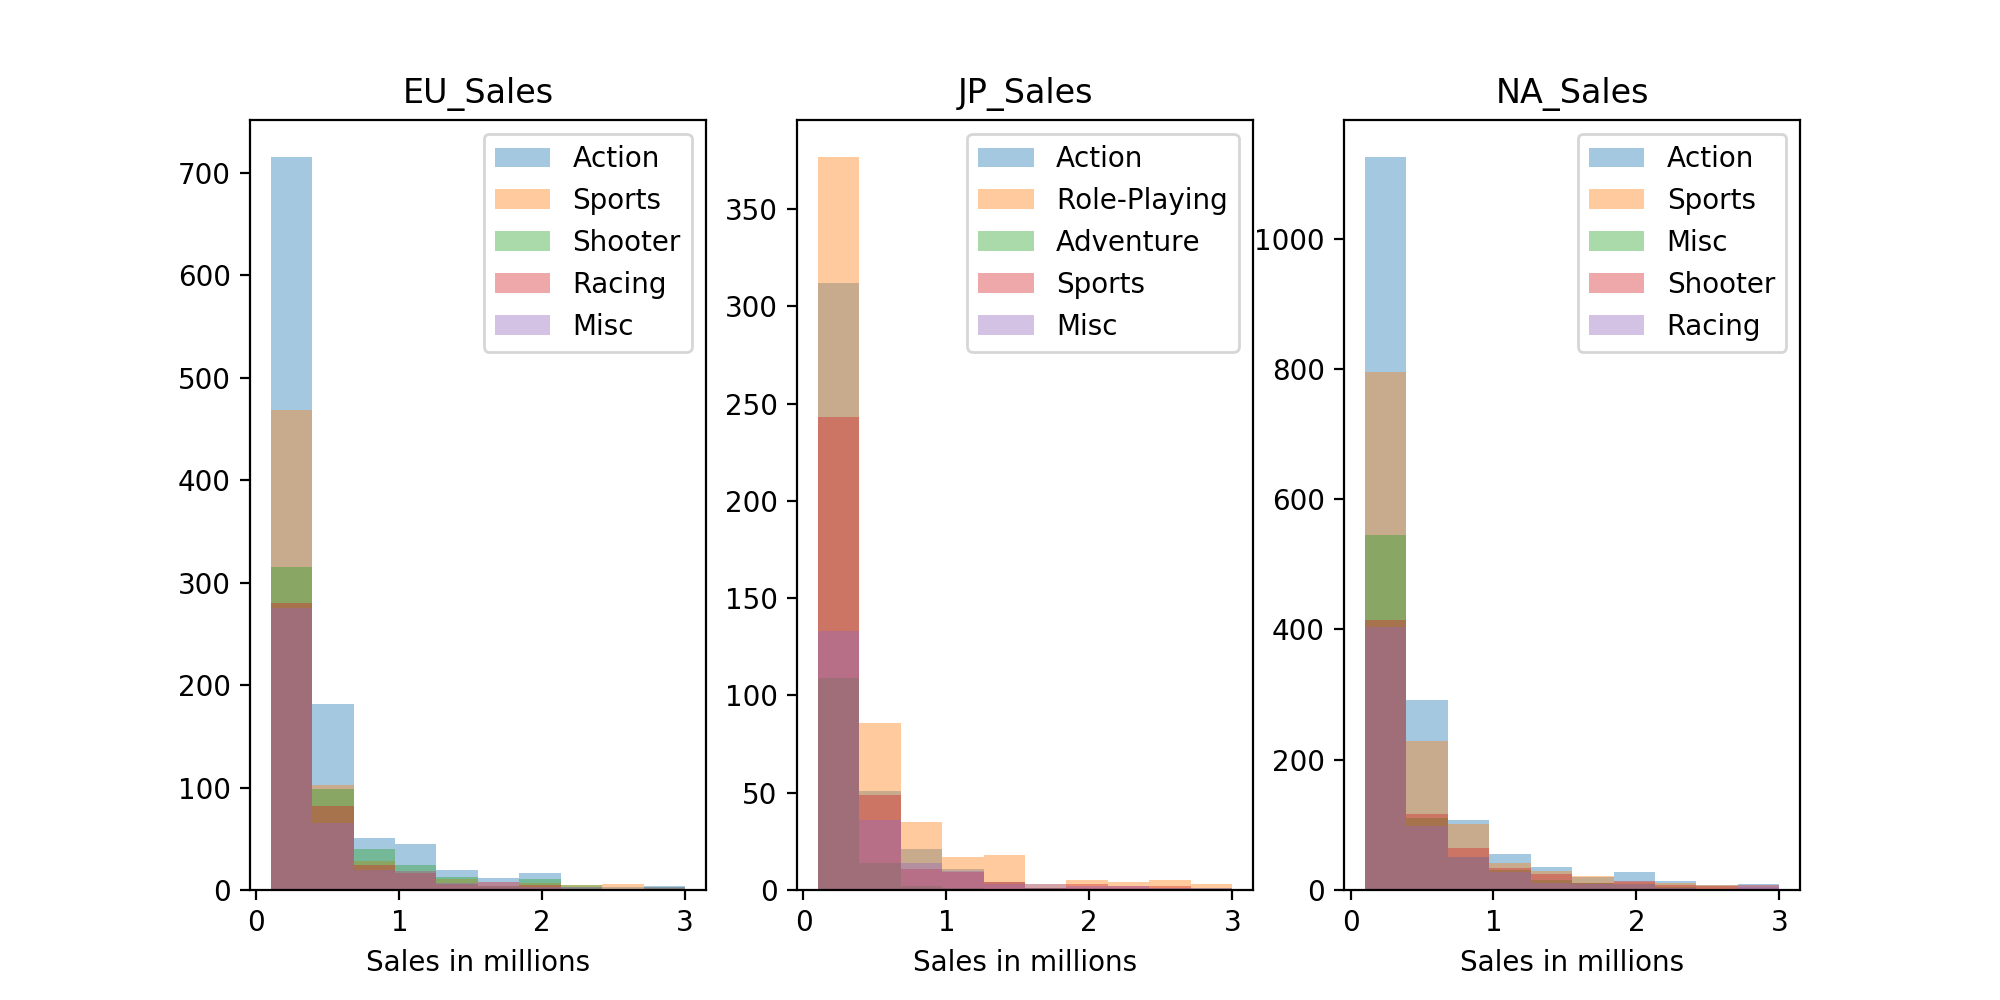

In [169]:
genre_market_trends(2, (0.1, 3))

<IPython.core.display.Javascript object>


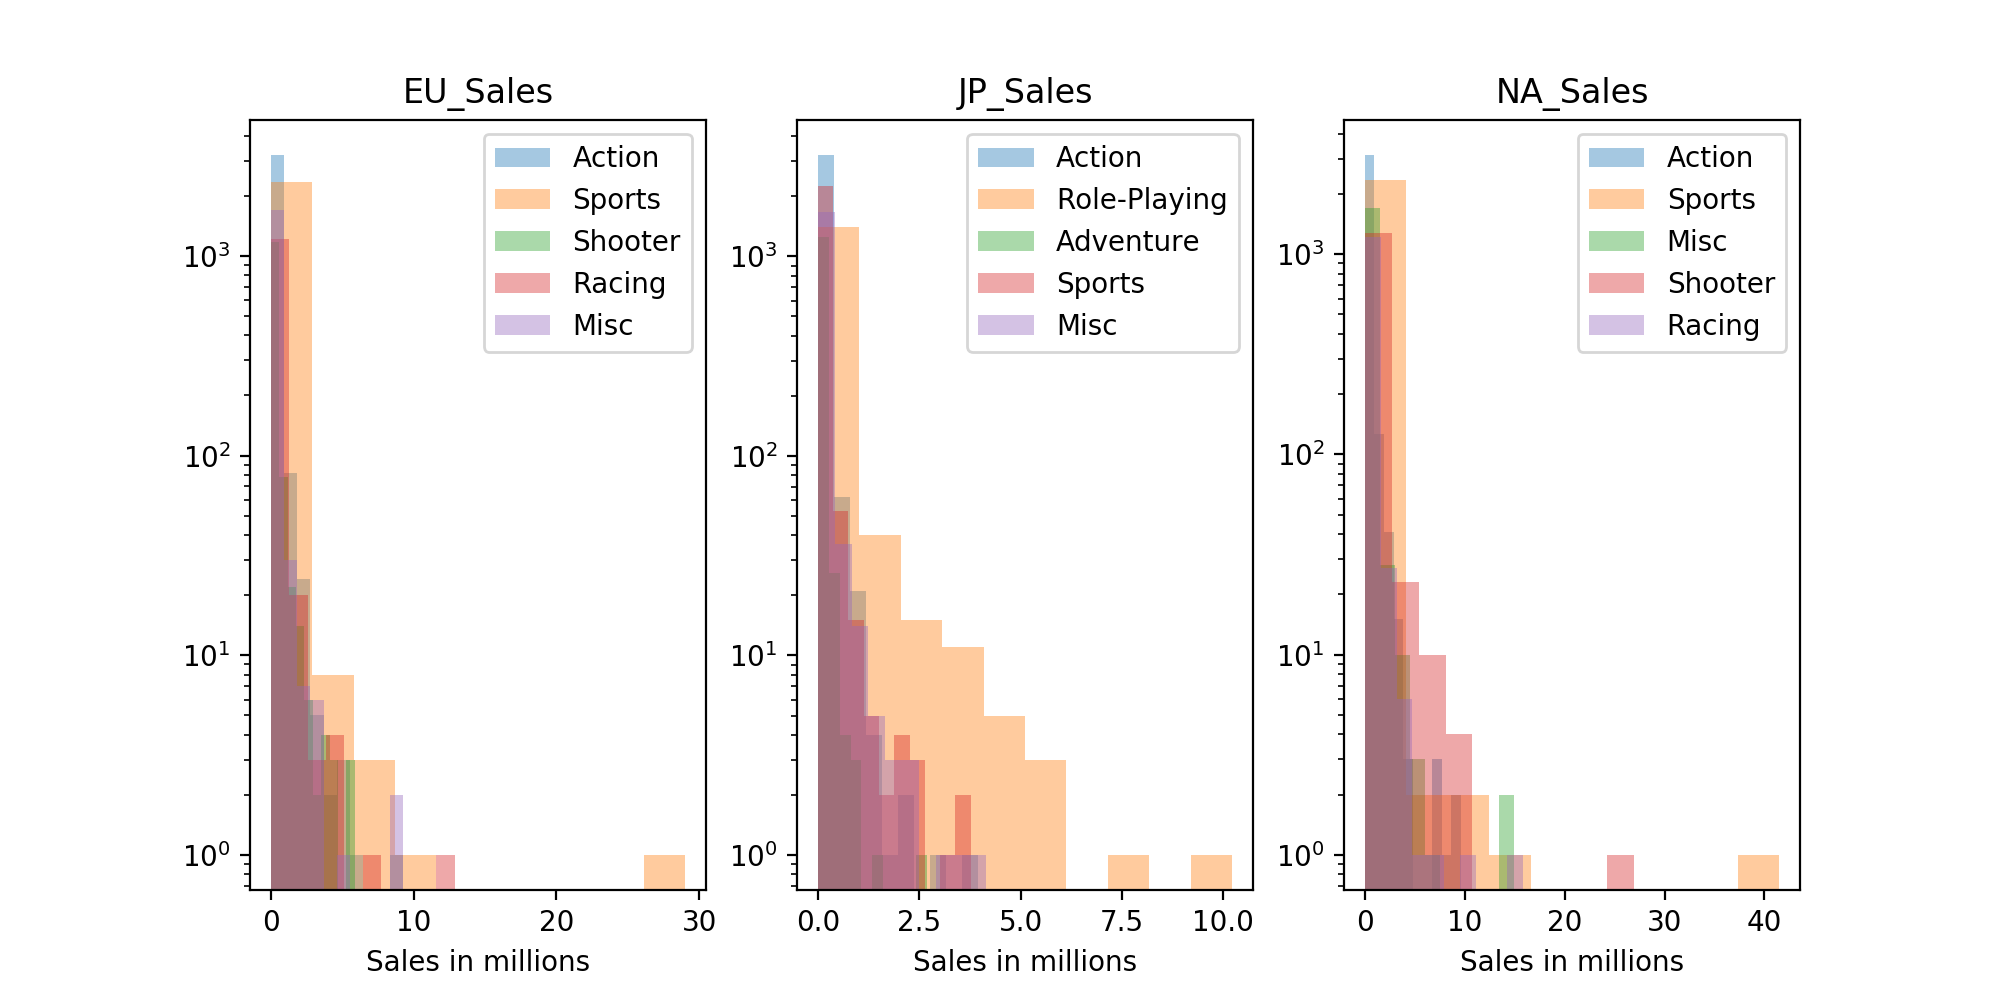

In [170]:
genre_market_trends(3, None, True)

# What are some major differences between the North American, European, and Japanese video game markets?

In [101]:
df[df['JP_Sales'] > 0]['Publisher'].value_counts()[:10]

Namco Bandai Games              732
Nintendo                        630
Konami Digital Entertainment    497
Sega                            361
Sony Computer Entertainment     293
Tecmo Koei                      272
Capcom                          249
Electronic Arts                 236
Square Enix                     177
Idea Factory                    123
Name: Publisher, dtype: int64

In [102]:
df[df['EU_Sales'] > 0]['Publisher'].value_counts()[:10]

Electronic Arts                 1215
Activision                       790
Ubisoft                          758
THQ                              614
Sony Computer Entertainment      536
Nintendo                         524
Konami Digital Entertainment     403
Sega                             351
Take-Two Interactive             335
Namco Bandai Games               321
Name: Publisher, dtype: int64

In [103]:
df[df['NA_Sales'] > 0]['Publisher'].value_counts()[:10]

Electronic Arts                 1259
Activision                       947
Ubisoft                          823
THQ                              697
Sony Computer Entertainment      532
Nintendo                         527
Konami Digital Entertainment     481
Take-Two Interactive             394
Sega                             356
Atari                            340
Name: Publisher, dtype: int64

In [148]:
df[df['JP_Sales'] > 1]['Publisher'].value_counts()[:10]

Nintendo                        125
Sony Computer Entertainment      16
SquareSoft                       14
Namco Bandai Games               12
Konami Digital Entertainment     11
Enix Corporation                 11
Square Enix                      10
Capcom                           10
Hudson Soft                       4
ASCII Entertainment               4
Name: Publisher, dtype: int64

In [147]:
df[df['EU_Sales'] > 1]['Publisher'].value_counts()[:10]

Nintendo                        95
Electronic Arts                 78
Sony Computer Entertainment     57
Activision                      45
Ubisoft                         36
Take-Two Interactive            21
Microsoft Game Studios          20
THQ                             15
Konami Digital Entertainment    13
Sega                            13
Name: Publisher, dtype: int64

In [146]:
df[df['NA_Sales'] > 1]['Publisher'].value_counts()[:10]

Nintendo                       171
Electronic Arts                140
Activision                      79
Sony Computer Entertainment     74
Take-Two Interactive            52
Ubisoft                         47
THQ                             40
Microsoft Game Studios          37
Sega                            27
Atari                           26
Name: Publisher, dtype: int64

In [104]:
df[df['JP_Sales'] > 0]['Platform'].value_counts()[:10]

PS2     797
PSP     765
DS      764
PS3     712
PS      402
X360    376
3DS     352
PSV     343
Wii     274
SNES    235
Name: Platform, dtype: int64

In [105]:
df[df['EU_Sales'] > 0]['Platform'].value_counts()[:10]

PS2     1635
X360    1003
PS       982
PS3      970
PC       893
DS       799
XB       764
Wii      752
GBA      699
GC       491
Name: Platform, dtype: int64

In [106]:
df[df['NA_Sales'] > 0]['Platform'].value_counts()[:10]

PS2     1648
DS      1531
Wii     1148
X360    1138
PS3     1001
PS       987
XB       821
GBA      752
PSP      589
GC       534
Name: Platform, dtype: int64

In [151]:
df[df['JP_Sales'] > 1]['Platform'].value_counts()[:10]

NES     39
DS      37
PS      29
SNES    29
GB      24
3DS     21
PS2     19
Wii     14
N64     11
GBA      4
Name: Platform, dtype: int64

In [150]:
df[df['EU_Sales'] > 1]['Platform'].value_counts()[:10]

PS2     80
PS3     69
X360    53
PS      50
Wii     43
DS      37
PS4     33
PC      30
3DS     11
PSP     11
Name: Platform, dtype: int64

In [149]:
df[df['NA_Sales'] > 1]['Platform'].value_counts()[:10]

PS2     146
X360    130
PS       87
PS3      84
Wii      81
DS       54
N64      35
PC       31
GBA      30
PS4      27
Name: Platform, dtype: int64

In [108]:
len(df[df['JP_Sales'] > 0])

6143

In [107]:
len(df[df['EU_Sales'] > 0])

10868

In [109]:
len(df[df['NA_Sales'] > 0])

12099

In [111]:
np.sum(df['JP_Sales'])

1291.0199999999018

In [112]:
np.sum(df['EU_Sales'])

2434.13000000055

In [113]:
np.sum(df['NA_Sales'])

4392.950000000332

In [114]:
len(df[(df['JP_Sales'] > 0) & (df['EU_Sales'] == 0)])

3619

In [115]:
len(df[(df['EU_Sales'] > 0) & (df['NA_Sales'] == 0)])

1124

In [116]:
len(df[(df['NA_Sales'] > 0) & (df['JP_Sales'] == 0)])

9414

In [117]:
len(df[(df['JP_Sales'] > 0) & (df['EU_Sales'] > 0)])

2524

In [118]:
len(df[(df['EU_Sales'] > 0) & (df['NA_Sales'] > 0)])

9744

In [119]:
len(df[(df['NA_Sales'] > 0) & (df['JP_Sales'] > 0)])

2685

In [121]:
len(df[df['Global_Sales'] > 1])

2054

In [122]:
len(df[df['JP_Sales'] > 1])

238

In [123]:
len(df[df['EU_Sales'] > 1])

470

In [124]:
len(df[df['NA_Sales'] > 1])

895

In [125]:
len(df[(df['JP_Sales'] > 1) & (df['EU_Sales'] > 1)])

83

In [126]:
len(df[(df['EU_Sales'] > 1) & (df['NA_Sales'] > 1)])

354

In [127]:
len(df[(df['NA_Sales'] > 1) & (df['JP_Sales'] > 1)])

107

In [129]:
len(df[(df['JP_Sales'] > 1) & (df['EU_Sales'] > 1) & (df['NA_Sales'] > 1)])

77

# What features about a video game are most indicative of its success?

In [139]:
def universal(sales):
    return (df[(df['JP_Sales'] > sales) & 
               (df['EU_Sales'] > sales) & 
               (df['NA_Sales'] > sales)]['Publisher']
            .value_counts())

In [141]:
universal(3)

Nintendo    20
Name: Publisher, dtype: int64

In [145]:
universal(2.6)

Nintendo    26
Name: Publisher, dtype: int64

In [143]:
universal(2)

Nintendo                       34
Sony Computer Entertainment     3
Name: Publisher, dtype: int64

In [142]:
universal(1)

Nintendo                       61
Sony Computer Entertainment    10
Virgin Interactive              2
Square Enix                     1
SquareSoft                      1
Electronic Arts                 1
Capcom                          1
Name: Publisher, dtype: int64

In [166]:
universal(0.5)

Nintendo                        123
Sony Computer Entertainment      15
Capcom                            8
Square Enix                       6
Konami Digital Entertainment      3
SquareSoft                        2
Virgin Interactive                2
Namco Bandai Games                2
Activision                        1
Take-Two Interactive              1
Electronic Arts                   1
Sega                              1
Eidos Interactive                 1
Name: Publisher, dtype: int64

In [367]:
def NAEU(sales):
    return (df[(df['EU_Sales'] > sales) & 
               (df['NA_Sales'] > sales)]['Publisher']
            .value_counts())

In [380]:
NAEU(7.1)

Nintendo    10
Name: Publisher, dtype: int64

In [368]:
NAEU(1)

Nintendo                                  86
Sony Computer Entertainment               42
Activision                                40
Electronic Arts                           37
Ubisoft                                   27
Take-Two Interactive                      20
Microsoft Game Studios                    19
THQ                                       11
Sega                                      10
Bethesda Softworks                         9
Eidos Interactive                          8
Warner Bros. Interactive Entertainment     8
Virgin Interactive                         5
LucasArts                                  5
505 Games                                  4
Konami Digital Entertainment               4
Namco Bandai Games                         4
Sony Computer Entertainment Europe         2
Capcom                                     2
Atari                                      2
Square Enix                                1
Universal Interactive                      1
Majesco En

In [176]:
df[df['Publisher'] == 'Nintendo']['Genre'].value_counts()

Platform        112
Role-Playing    106
Misc            100
Action           79
Puzzle           74
Sports           55
Racing           37
Adventure        35
Strategy         32
Simulation       29
Shooter          26
Fighting         18
Name: Genre, dtype: int64

<IPython.core.display.Javascript object>


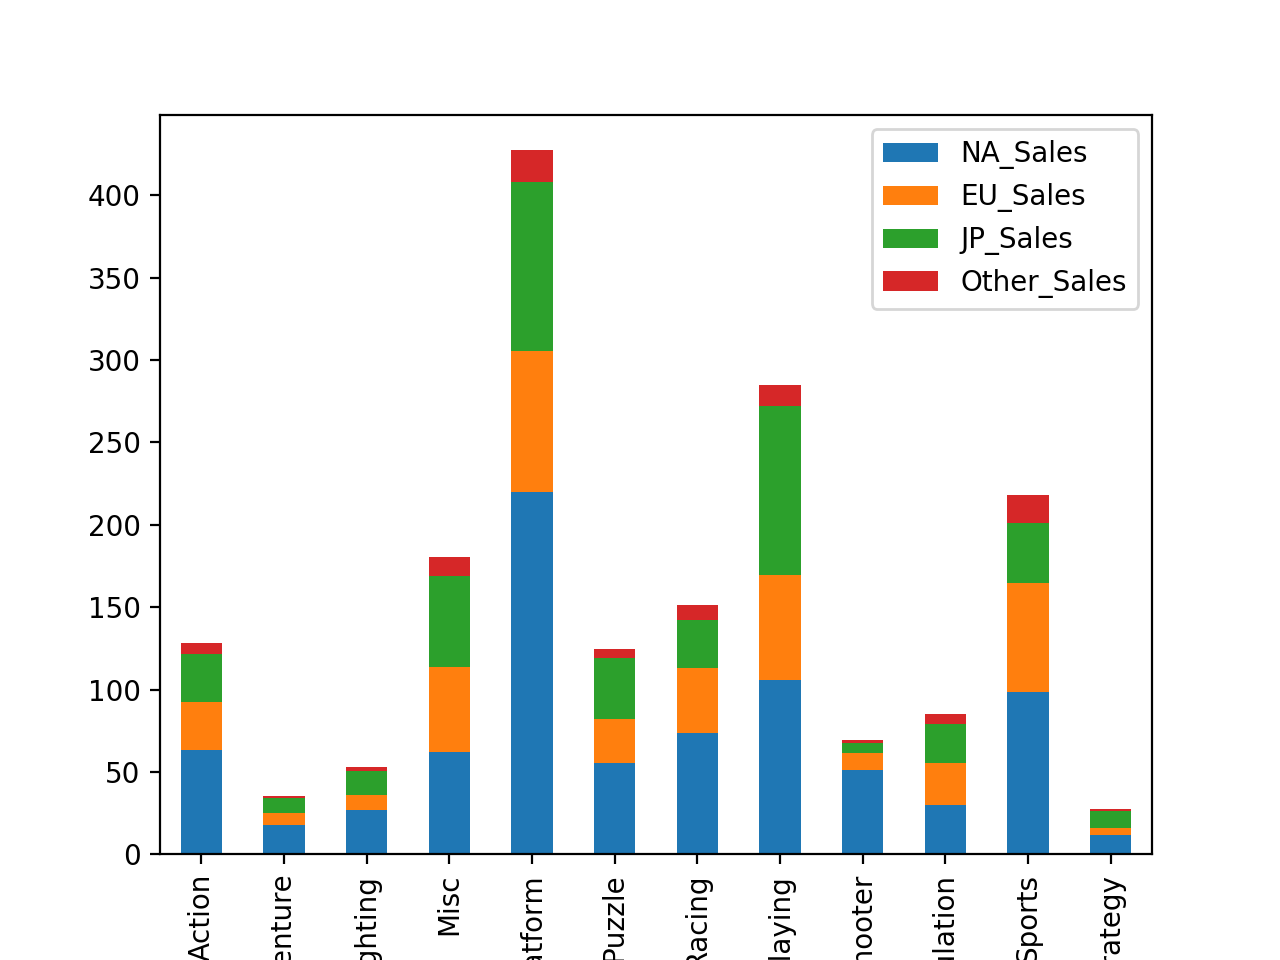

In [354]:
(df[df['Publisher'] == 'Nintendo']
 .groupby('Genre')
 .agg('sum')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
 .plot
 .bar(stacked=True));

<IPython.core.display.Javascript object>


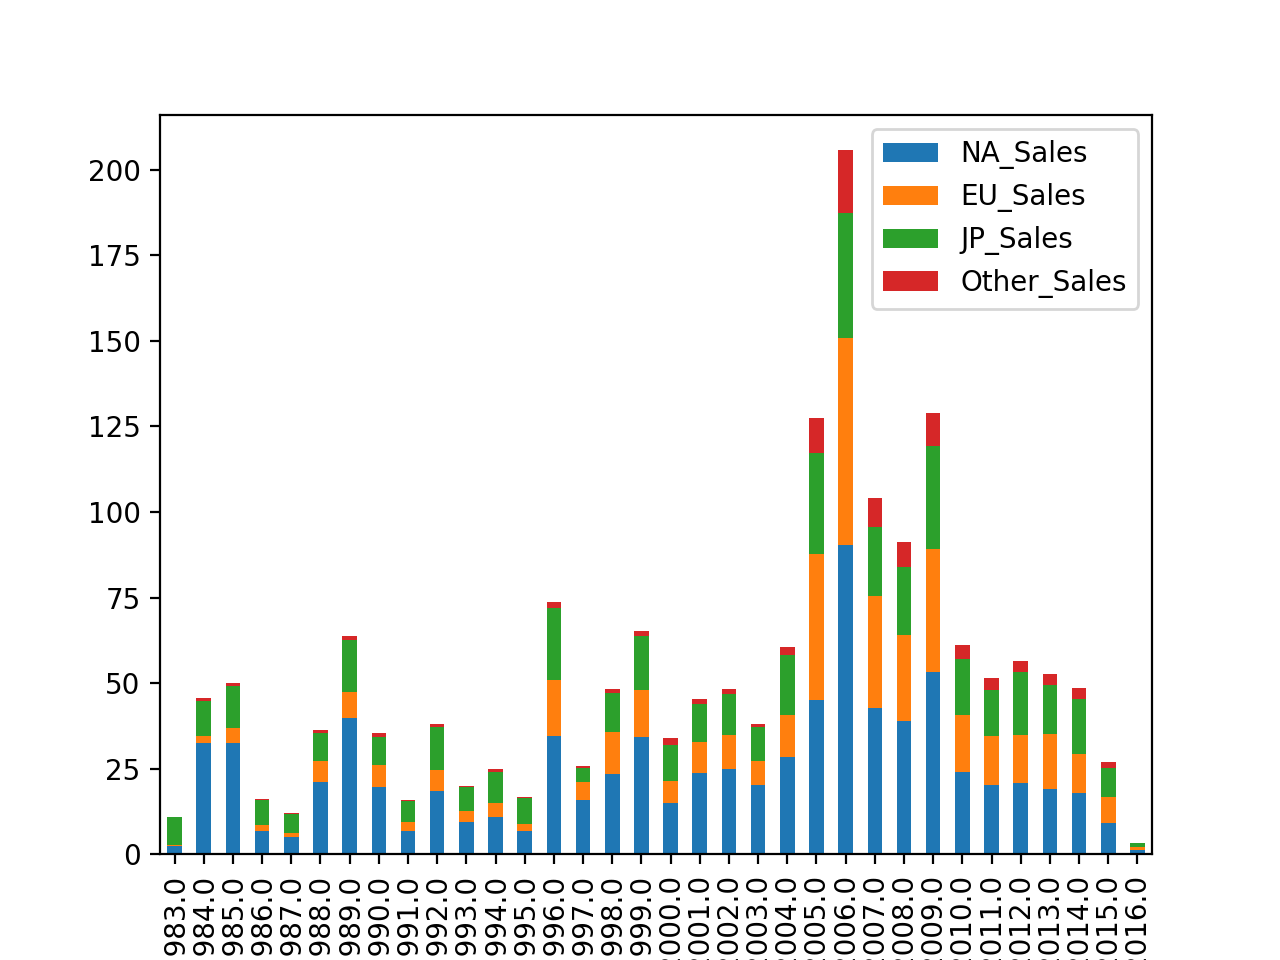

In [355]:
(df[df['Publisher'] == 'Nintendo']
 .groupby('Year')
 .agg('sum')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
 .plot
 .bar(stacked=True));

In [187]:
df['NA_fraction'] = df['NA_Sales'] / (df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'])

In [188]:
df['EU_fraction'] = df['EU_Sales'] / (df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'])

In [189]:
df['JP_fraction'] = df['JP_Sales'] / (df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'])

In [194]:
df['NAEUe2'] = (df['NA_fraction'] + df['EU_fraction'])**2

In [195]:
df['EUJPe2'] = (df['EU_fraction'] + df['JP_fraction'])**2

In [196]:
from matplotlib import cm

In [323]:
def dalitz():
    plt.figure(7)
    
    genres = (df['Genre']
              .value_counts()
              .index)
    colors = (cm
              .Paired(np
                       .linspace(0, 1, len(genres))))
    
    for idx, genre in enumerate(genres):
        plt.scatter(df[df['Genre'] == genre]['NAEUe2'],
                    df[df['Genre'] == genre]['EUJPe2'],
                    color = colors[idx],
                    marker = '.',
                    label = genre)
    
    plt.title('Dalitz Plot')
    plt.xlabel(r'(NA + EU Sales)$^2$ / (Total Sales)$^2$')
    plt.ylabel(r'(EU + JP Sales)$^2$ / (Total Sales)$^2$')
    plt.legend(loc = 3, fontsize = 'small')
    plt.show()

<IPython.core.display.Javascript object>


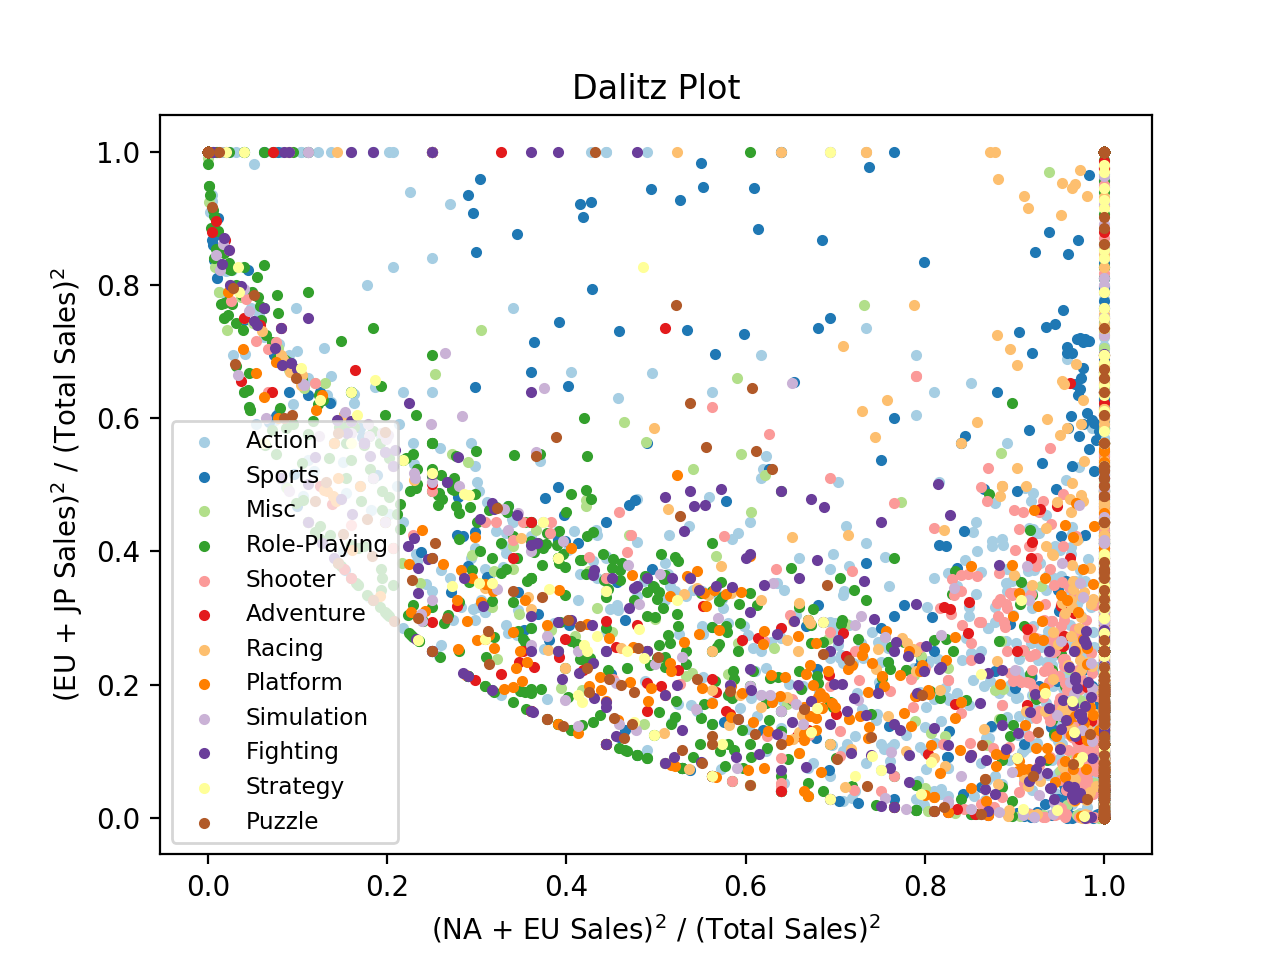

In [324]:
dalitz()

In [336]:
def publisher_df(df, publisher):
    df_pub = (df[df['Publisher'] == publisher]
              .groupby('Year')
              .agg(['sum', 'count'])[['Global_Sales']])
    df_pub['sum / count'] = df_pub['Global_Sales', 'sum'] / df_pub['Global_Sales', 'count']
    df_pub['sum / count / yr'] = df_pub['sum / count'] / (2017.0 - df_pub.index)
    return df_pub

In [381]:
def plot_publishers():
    plt.figure(8)
    for publisher in df['Publisher'].unique()[:10]:
        pub_df = publisher_df(df, publisher)
        pub_df['sum / count'].plot(label = publisher)
    plt.xlim(1980.0, 2016.0)
    plt.legend()
    plt.ylabel('Year')
    plt.ylabel('Sales [$M] / # games released that yr.')
    plt.show()

<IPython.core.display.Javascript object>


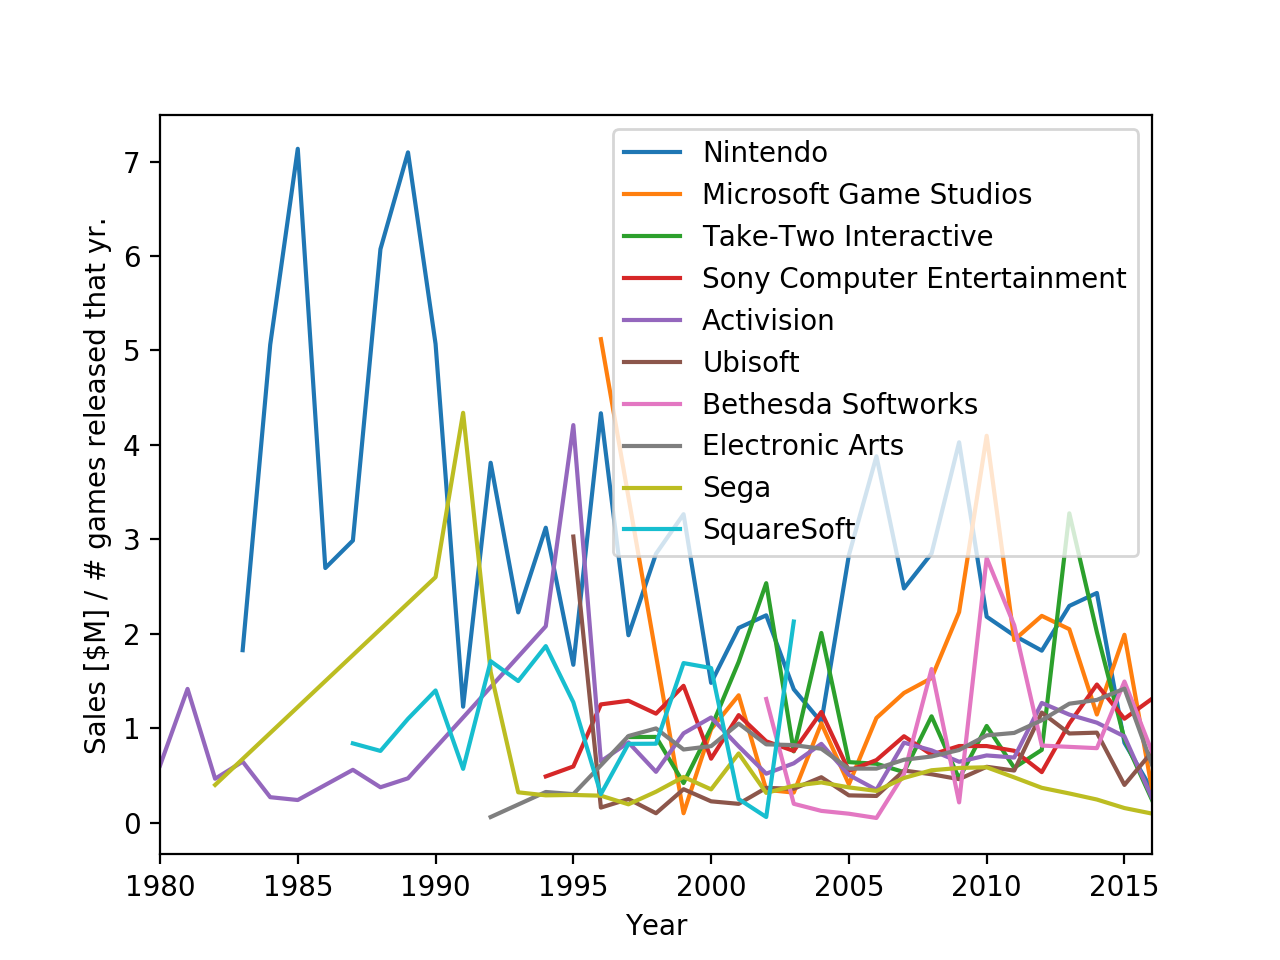

In [382]:
plot_publishers()

In [366]:
df.groupby(['Publisher', 'Year']).agg(['count', 'sum'])[['NA_Sales', 'EU_Sales', 'JP_Sales']]

NA_Sales       EU_Sales       JP_Sales  \
                                       count   sum    count   sum    count   
Publisher                    Year                                            
10TACLE Studios              2006.0        1  0.01        1  0.01        1   
                             2007.0        2  0.06        2  0.03        2   
1C Company                   2009.0        1  0.00        1  0.01        1   
                             2011.0        2  0.01        2  0.06        2   
20th Century Fox Video Games 1981.0        3  1.27        3  0.07        3   
                             1982.0        2  0.55        2  0.03        2   
2D Boy                       2008.0        1  0.00        1  0.03        1   
3DO                          1998.0        2  0.30        2  0.09        2   
                             1999.0        6  3.01        6  0.96        6   
                             2000.0       10  1.86       10  1.04       10   
                             2001.0       11  0.76       11  0.56       11   
                             2002.0        4  0.30        4  0.23        4   
                             2003.0        3  0.25        3  0.16        3   
49Games                      2009.0        1  0.00        1  0.04        1   
505 Games                    2002.0        1  0.02        1  0.02        1   
                             2003.0        1  0.05        1  0.04        1   
                             2004.0       10  0.49       10  0.30       10   
                             2005.0       13  0.89       13  0.17       13   
                             2006.0       22  4.15       22  2.10       22   
                             2007.0       28  6.08       28  2.81       28   
                             2008.0       13  2.09       13  0.30       13   
                             2009.0       30  4.73       30  1.89       30   
                             2010.0       22  8.50       22  4.42       22   
                             2011.0       21  1.98       21  0.90       21   
                             2012.0        8  0.89        8  1.07        8   
                             2013.0        6  1.00        6  0.95        6   
                             2014.0        6  0.67        6  0.82        6   
                             2015.0        4  0.23        4  0.30        4   
                             2016.0        7  0.06        7  0.34        7   
5pb                          2008.0        5  0.00        5  0.00        5   
...                                      ...   ...      ...   ...      ...   
Yumedia                      1995.0        1  0.00        1  0.00        1   
Zenrin                       2006.0        1  0.00        1  0.00        1   
                             2007.0        1  0.00        1  0.00        1   
Zoo Digital Publishing       2002.0        6  0.14        6  0.06        6   
                             2003.0        9  1.31        9  0.76        9   
                             2004.0       17  2.04       17  0.71       17   
                             2005.0       31  2.27       31  0.85       31   
                             2006.0        6  0.34        6  0.00        6   
                             2007.0       12  1.08       12  0.01       12   
                             2008.0       12  1.29       12  0.05       12   
                             2009.0       11  1.05       11  0.01       11   
Zoo Games                    2008.0        8  0.89        8  0.00        8   
                             2009.0       11  2.27       11  0.00       11   
                             2010.0       12  1.04       12  0.00       12   
                             2011.0        2  0.32        2  0.00        2   
Zushi Games                  2007.0        1  0.04        1  0.00        1   
                             2008.0        4  0.50        4  0.00        4   
                             2009.0       13  1.13       1